In [14]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
import pandas as pd
import numpy as np
%matplotlib inline

training_file = './imgs/train.p'

def open_file(input_file):
    with open(input_file, mode='rb') as f:
        output_file = pickle.load(f)
    X_data, y_data = output_file['features'], output_file['labels']
    return X_data, y_data

X_train, y_train = open_file(training_file)


-0.354081335648


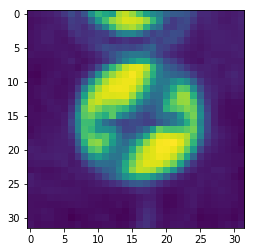

In [15]:

from math import ceil
from sklearn.utils import shuffle

def reduce_channel(x):
    out = np.sum(x / 3, axis = 3, keepdims = True) 
    return out

def f_normalize(x):
    out =  (x - 128) / 128
    return out

X_train_gray = reduce_channel(X_train)
X_train = f_normalize(X_train_gray)
print (X_train.mean())
plt.imshow(X_train[2].squeeze())

0 0


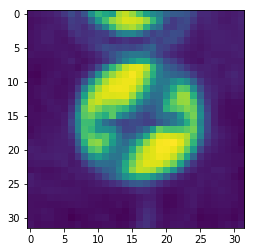

In [23]:
import cv2
i = 2
dx, dy = np.random.randint(-2, 2, 2)
print (dx, dy)
M = np.float32([[1, 0, dx], [0, 1, dy]])
dst = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
dst = dst[:,:,None]
plt.imshow(dst.squeeze())

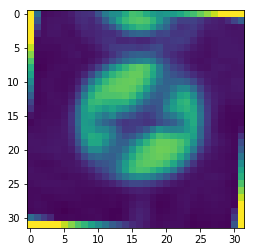

In [25]:


tilt = np.random.randint(-10, 10)
M = cv2.getRotationMatrix2D((X_train[i].shape[0]/2, X_train[i].shape[1]/2), tilt, 1)
dst2 = cv2.warpAffine(X_train[i], M, (X_train[i].shape[0], X_train[i].shape[1]))
dst2 = dst2[:,:,None]
plt.imshow(dst2.squeeze()) 

2


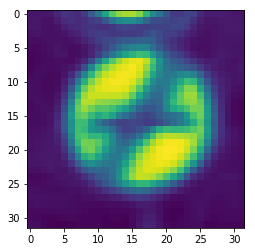

In [36]:

rows =32
cols = 32
# transform limits
px = np.random.randint(-3, 3)
print(px)
# ending locations
pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
# starting locations (4 corners)
pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst3 = cv2.warpPerspective(X_train[i],M,(rows,cols))
dst3 = dst3[:,:,None]
plt.imshow(dst3.squeeze()) 